In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load the data
df = pd.read_csv('heart.csv')

# Display basic info
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nTarget distribution:")
print(df['target'].value_counts())
print("\nBasic statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTraining set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Dataset Shape: (1025, 14)

First few rows:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 n

Basic Decision Tree Accuracy: 0.9854


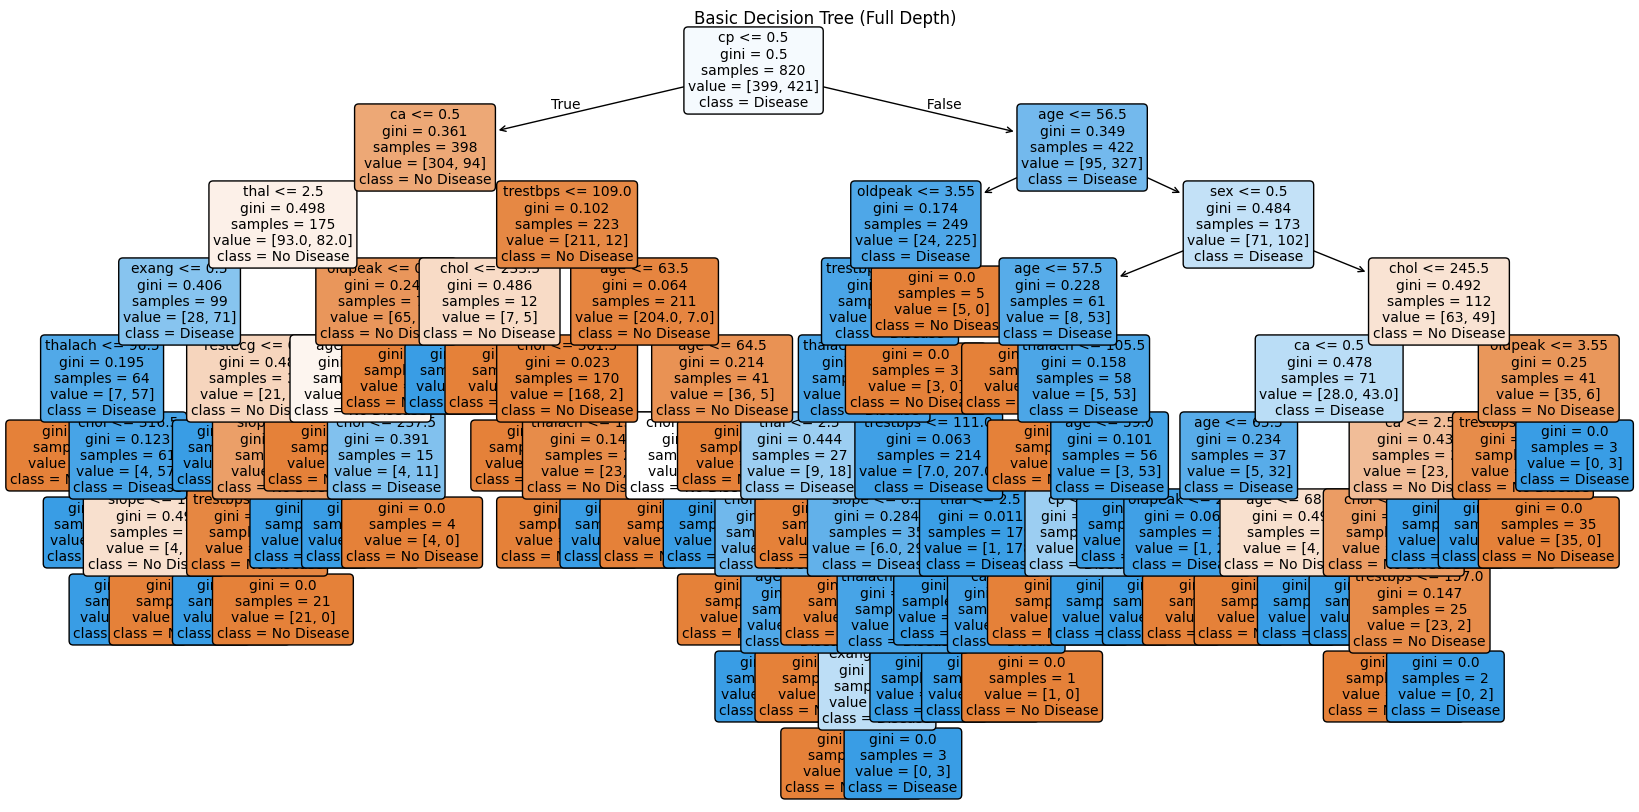

Tree depth: 9
Number of leaves: 49


In [2]:
# 1. Train a Decision Tree Classifier and visualize
dt_basic = DecisionTreeClassifier(random_state=42)
dt_basic.fit(X_train, y_train)

# Make predictions
y_pred_basic = dt_basic.predict(X_test)
accuracy_basic = accuracy_score(y_test, y_pred_basic)
print(f"Basic Decision Tree Accuracy: {accuracy_basic:.4f}")

# Visualize the tree
plt.figure(figsize=(20, 10))
plot_tree(dt_basic, 
          feature_names=X.columns,
          class_names=['No Disease', 'Disease'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title('Basic Decision Tree (Full Depth)')
plt.show()

# Print tree depth
print(f"Tree depth: {dt_basic.get_depth()}")
print(f"Number of leaves: {dt_basic.get_n_leaves()}")

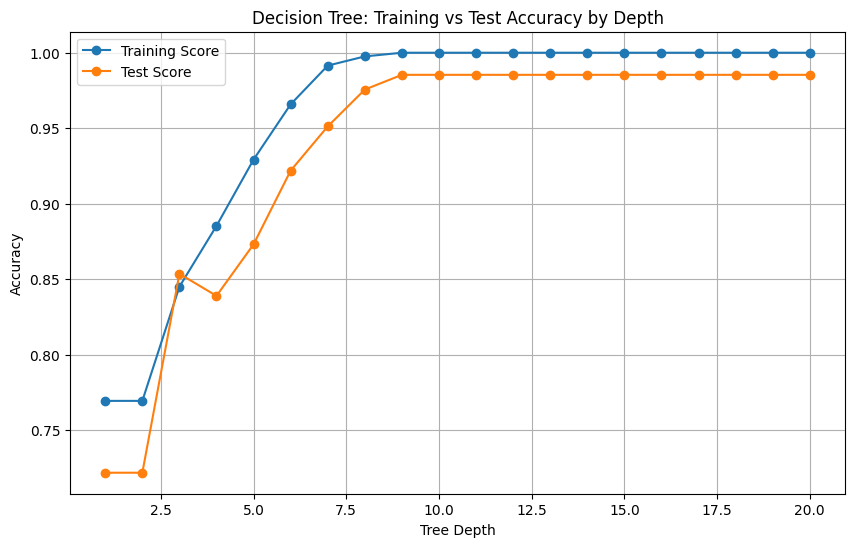

Optimal depth: 9
Best test accuracy: 0.9854
Optimized Decision Tree Accuracy: 0.9171


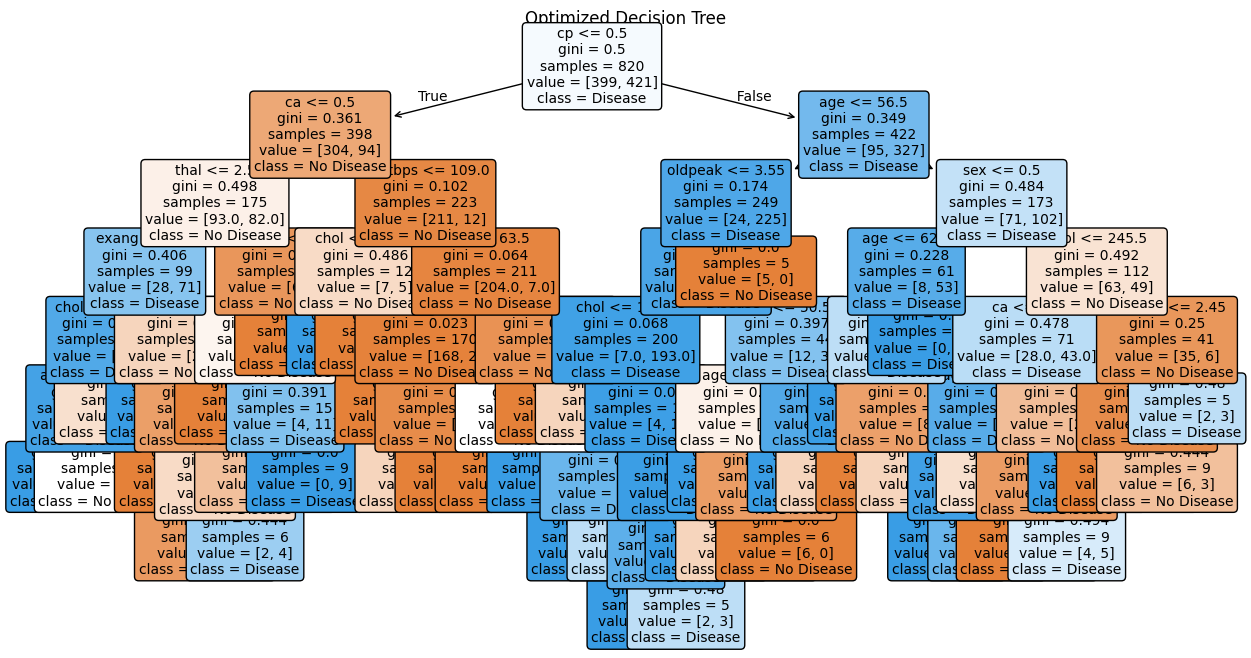

In [3]:
# 2. Analyze overfitting and control tree depth
# Train trees with different depths
train_scores = []
test_scores = []
depths = range(1, 21)

for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    
    train_score = dt.score(X_train, y_train)
    test_score = dt.score(X_test, y_test)
    
    train_scores.append(train_score)
    test_scores.append(test_score)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(depths, train_scores, 'o-', label='Training Score')
plt.plot(depths, test_scores, 'o-', label='Test Score')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree: Training vs Test Accuracy by Depth')
plt.legend()
plt.grid(True)
plt.show()

# Find optimal depth
optimal_depth = depths[np.argmax(test_scores)]
print(f"Optimal depth: {optimal_depth}")
print(f"Best test accuracy: {max(test_scores):.4f}")

# Train optimized decision tree
dt_optimized = DecisionTreeClassifier(
    max_depth=optimal_depth,
    min_samples_split=5,
    min_samples_leaf=5,
    random_state=42
)
dt_optimized.fit(X_train, y_train)

y_pred_optimized = dt_optimized.predict(X_test)
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
print(f"Optimized Decision Tree Accuracy: {accuracy_optimized:.4f}")

# Visualize optimized tree
plt.figure(figsize=(15, 8))
plot_tree(dt_optimized, 
          feature_names=X.columns,
          class_names=['No Disease', 'Disease'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title('Optimized Decision Tree')
plt.show()

In [4]:
# 3. Train Random Forest and compare
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=optimal_depth,
    min_samples_split=5,
    min_samples_leaf=5,
    random_state=42
)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

# Compare all models
models = {
    'Basic Decision Tree': dt_basic,
    'Optimized Decision Tree': dt_optimized,
    'Random Forest': rf
}

for name, model in models.items():
    if name == 'Basic Decision Tree':
        pred = y_pred_basic
    elif name == 'Optimized Decision Tree':
        pred = y_pred_optimized
    else:
        pred = y_pred_rf
    
    accuracy = accuracy_score(y_test, pred)
    print(f"\n{name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, pred))

Random Forest Accuracy: 0.9561

Basic Decision Tree:
Accuracy: 0.9854
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       100
           1       1.00      0.97      0.99       105

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205


Optimized Decision Tree:
Accuracy: 0.9171
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       100
           1       0.92      0.91      0.92       105

    accuracy                           0.92       205
   macro avg       0.92      0.92      0.92       205
weighted avg       0.92      0.92      0.92       205


Random Forest:
Accuracy: 0.9561
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       100
           1       0.9

Decision Tree Feature Importance:
     feature  importance_dt
2         cp       0.326948
11        ca       0.157281
0        age       0.148687
12      thal       0.090572
4       chol       0.082458
9    oldpeak       0.050460
1        sex       0.043125
8      exang       0.029958
6    restecg       0.023991
7    thalach       0.016593
3   trestbps       0.010758
5        fbs       0.010368
10     slope       0.008801

Random Forest Feature Importance:
     feature  importance_rf
2         cp       0.165432
11        ca       0.130293
12      thal       0.114674
9    oldpeak       0.108759
7    thalach       0.097886
8      exang       0.090450
0        age       0.080914
3   trestbps       0.057331
4       chol       0.052390
10     slope       0.050433
1        sex       0.026958
6    restecg       0.017958
5        fbs       0.006520


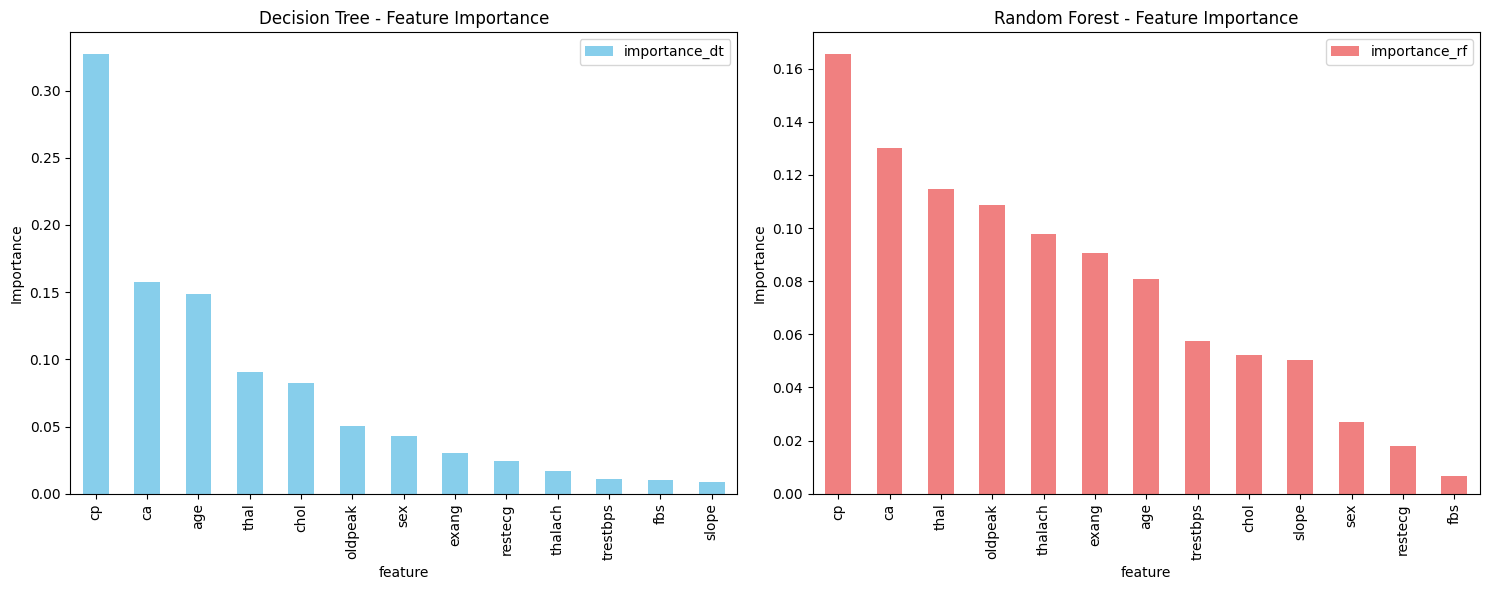

In [5]:
# 4. Interpret feature importances
# Get feature importance from both models
dt_importance = pd.DataFrame({
    'feature': X.columns,
    'importance_dt': dt_optimized.feature_importances_
}).sort_values('importance_dt', ascending=False)

rf_importance = pd.DataFrame({
    'feature': X.columns,
    'importance_rf': rf.feature_importances_
}).sort_values('importance_rf', ascending=False)

print("Decision Tree Feature Importance:")
print(dt_importance)
print("\nRandom Forest Feature Importance:")
print(rf_importance)

# Plot feature importance comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Decision Tree feature importance
dt_importance.plot(kind='bar', x='feature', y='importance_dt', ax=ax1, color='skyblue')
ax1.set_title('Decision Tree - Feature Importance')
ax1.set_ylabel('Importance')

# Random Forest feature importance
rf_importance.plot(kind='bar', x='feature', y='importance_rf', ax=ax2, color='lightcoral')
ax2.set_title('Random Forest - Feature Importance')
ax2.set_ylabel('Importance')

plt.tight_layout()
plt.show()